### Load packages

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
import os

### Set variables

In [12]:
output_path = './'
run_name = 'output'

## plot stiff potential

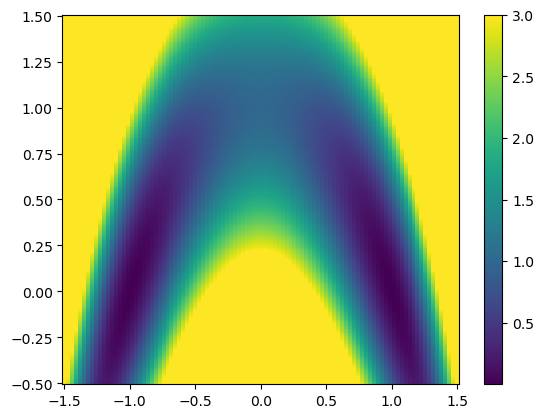

In [13]:
xmin, xmax = -1.5, 1.5
ymin, ymax = -0.5, 1.5
nx = 100
ny = 200
x=np.linspace(xmin, xmax, nx)
y=np.linspace(ymin, ymax, ny)

eps = 0.3
X, Y = np.meshgrid(x,y)

V = (X**2 - 1)**2 + 1/eps * (X**2+Y-1)**2

fig, ax = plt.subplots()
pc = ax.pcolormesh(X,Y,V, vmax=3)
fig.colorbar(pc, ax=ax)

## plot trajectory

Text(0.5, 1.0, 'y')

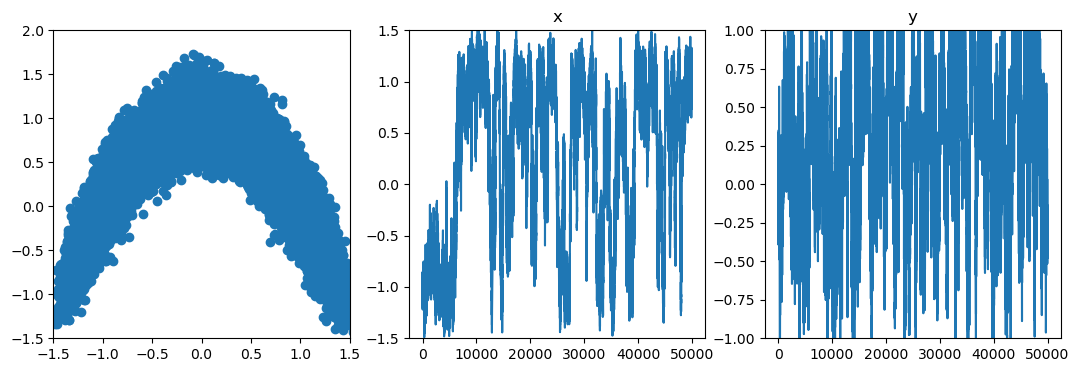

In [17]:
traj_file = '%s/%s.txt' % (output_path, run_name)
traj_raw_data = np.loadtxt(traj_file)
fig, ax = plt.subplots(1,3, figsize=(13, 4))
ax[0].scatter(traj_raw_data[:,1], traj_raw_data[:,2])
ax[0].set_xlim([-1.5, 1.5])
ax[0].set_ylim([-1.5, 2.0])

ax[1].plot(traj_raw_data[:,1], label='x')
ax[1].set_ylim([-1.5, 1.5])
ax[1].set_title('x')

ax[2].plot(traj_raw_data[:,2], label='y')
ax[2].set_ylim([-1.0, 1.0])
ax[2].set_title('y')

.//output.czar.pmf
ncv= 1
[-1.525, 0.05, 61.0, 0.0]
(61, 1)


Text(0.5, 1.0, 'czar.pmf')

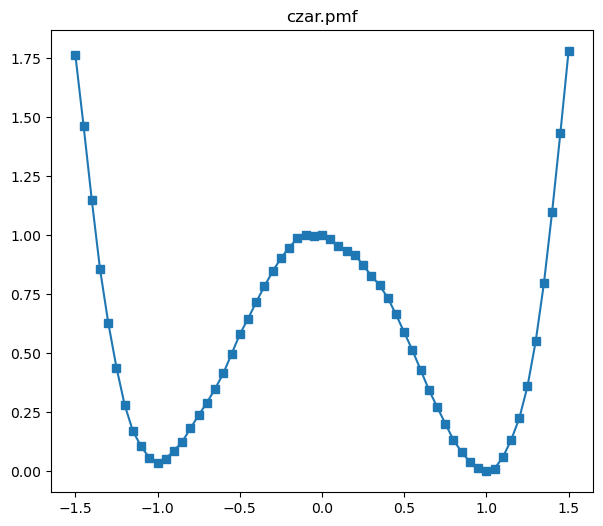

In [18]:
prefix = '' #'.hist'
name_list = ['count', 'zcount', 'grad', 'zgrad', 'czar.grad', 'pmf', 'czar.pmf', 'histogram1.dat']
name_id = 6

name = name_list[name_id]
data_file = '%s/%s%s.%s' % (output_path,run_name, prefix, name)
print (data_file)

file = open(data_file, 'r')
line = file.readline()
ncv = int (line.split()[1])
print ('ncv=', ncv)
line = file.readline()
cv1 = [float (x) for x in line.split()[1:]]
print (cv1)
n1 = int (cv1[2]) 
xl = cv1[0]
w= cv1[1]

gridx = np.loadtxt(data_file, usecols=(0)).reshape(n1,1)

file.close()   

# read data

data_vec = np.loadtxt(data_file, usecols=1).reshape(n1,1)
    
print (data_vec.shape)

# plot 

fig, ax = plt.subplots(1,1, figsize=(7, 6))

ax.plot(gridx, data_vec[:,0], marker='s')
ax.set_title(name)

### ABF traj

./output.colvars.traj
['step', 'd', 'r_d']
                step          d        r_d
count      50.000000  50.000000  50.000000
mean   245000.000000   0.171852   0.225357
std    145773.797371   0.860047   0.904431
min         0.000000  -1.291177  -1.389026
25%    122500.000000  -0.603782  -0.649642
50%    245000.000000   0.428504   0.356949
75%    367500.000000   0.879534   0.972664
max    490000.000000   1.511028   1.749045
Index(['step', 'd', 'r_d'], dtype='object')


<AxesSubplot: xlabel='step'>

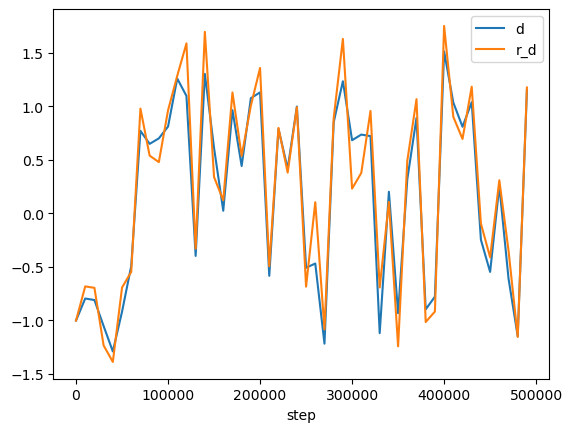

In [19]:
cv_traj_file = './%s.colvars.traj' % (run_name)
print (cv_traj_file)
cv_traj_data = np.loadtxt(cv_traj_file)

line = open(cv_traj_file, 'r').readline()
col_names=line.split()[1:]
print (col_names)
ncol_per_cv = int ((len(col_names) - 1) / 2) 

cv_df = pd.DataFrame(cv_traj_data, columns=col_names)
print (cv_df.describe())
print (cv_df.columns)

cv_df.plot(x='step', y=[col_names[1], col_names[1+ncol_per_cv]])
